In [32]:
import pandas as pd
import numpy as np
from plotnine import *

In [2]:
df = pd.read_csv(r'C:\Users\1000257489\Documents\2022\Angelina\Study\Data\SRST_XTI_OD_Sample.zip')
df.shape

(1989526, 5)

In [3]:
df.head()

build      media Track_group  delSER_Max  Initial_SER
0  GD2b_PHO_DepositIBDSNiTa  SZ_SD4d_2         NTI        0.04        -1.91
1  GD2b_PHO_DepositIBDSNiTa  SZ_SD4d_2   Track#2-3        0.18        -1.89
2  GD2b_PHO_DepositIBDSNiTa  SZ_SD4d_2         NTI        0.05        -1.74
3  GD2b_PHO_DepositIBDSNiTa  SZ_SD4d_2   Track#2-3        0.21        -1.73
4  GD2b_PHO_DepositIBDSNiTa  SZ_SD4d_2         NTI        0.07        -2.02

In [5]:
df[['build', 'media', 'Track_group']].value_counts()

build                     media      Track_group
GD2b_PHO_MP               SZ_SD4d_2  NTI            692608
                                     Track#2-3      692608
                          SZ_SD5st   NTI            202773
                                     Track#2-3      202773
GD2b_PHO_DepositIBDSNiTa  SZ_SD4d_2  NTI             68162
                                     Track#2-3       68162
                          SZ_SD5st   NTI             31220
                                     Track#2-3       31220
dtype: int64

In [10]:
df_sub = df.sample(frac=0.004)
df_sub.shape

(7958, 5)

In [7]:
# df_NTI = df.loc[df['Track_group']=='NTI']
# df_Tk23 = df.loc[df['Track_group']=='Track#2-3']
# df_NTI.shape, df_Tk23.shape

((994763, 5), (994763, 5))

C:\Users\1000257489\Anaconda3\lib\site-packages\plotnine\layer.py:334: PlotnineWarning: stat_ellipse : Removed 303 rows containing non-finite values.


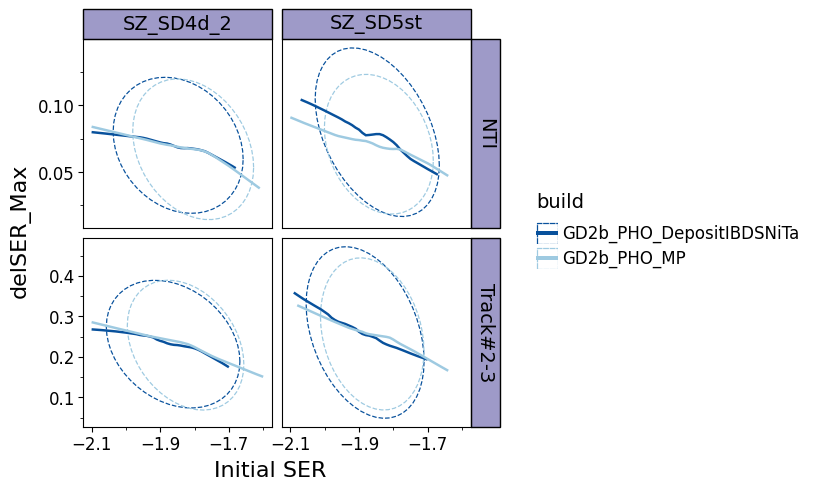

In [40]:
p = (ggplot(df_sub, aes(x='Initial_SER', y='delSER_Max', color='build'))
     + stat_ellipse(fill='none', geom='polygon', level=0.95, alpha=0.2, linetype='dashed')
     + geom_smooth(method='lowess', span=0.6, se=False, size=1)
     + scale_color_manual(values=['#08519c', '#9ecae1'])
     + facet_grid('Track_group ~ media', scales='free') # scale设置x,y轴范围
     + scale_x_continuous(breaks=np.arange(-2.1, -1.6, 0.2), name='Initial SER', limits=[-2.1, -1.6])
     + theme_matplotlib()
     + theme(axis_title=element_text(size=16, color='k', face='plain'),
            axis_text=element_text(size=12, color='k', face='plain'),
            legend_title=element_text(size=14, color='k', face='plain'),
            legend_text=element_text(size=12, color='k', face='plain'),
            strip_text=element_text(color='black', size=14),
            strip_background=element_rect(fill='#9e9ac8', color='black'), # 设置分面条的线条和填充颜色
            legend_background=element_blank(),
            aspect_ratio=1,
            figure_size=(5, 5),
            dpi=100)
    )
print(p)

In [39]:
p.save('XTI.png', dpi=200)

C:\Users\1000257489\Anaconda3\lib\site-packages\plotnine\ggplot.py:718: PlotnineWarning: Saving 5 x 5 in image.
C:\Users\1000257489\Anaconda3\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Filename: XTI_xkcd.png
C:\Users\1000257489\Anaconda3\lib\site-packages\plotnine\layer.py:334: PlotnineWarning: stat_ellipse : Removed 303 rows containing non-finite values.
